# <center>Cardiovascular Patients</center>

![Name!](https://nurseslabs.com/wp-content/uploads/2016/09/FT-Heart-Failure-1.png) 

### PROJECT
<p style='text-align:justify;'>  The Project will be based on the increasing number of patients suffering from heart failure. In this project I will be using Python DataFrame concepts and some Packages such as Pandas, NumPy, Matplotlib and Seaborn.</p>

### DATASET
The dataset was collected from [BMC Medical Informatics and Decision Making](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Sec2)

## Downloading the Dataset

The Dataset was downloaded from BMC Medical Informatics and Decision Making Website. The dataset obtained was in a CSV Format and for this I imported the pd.read function to read the dataset in a DataFrame 

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
import numpy as np
import pandas as pd

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
import urllib.request

In [4]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/lafirm/datasets/main/heart_failure_clinical_records_dataset.csv','heart')

('heart', <http.client.HTTPMessage at 0x7f52572f1250>)

The dataset has been downloaded and extracted.

Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = 'heart'

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [156]:
jovian.commit(project='cardio')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilgawate111/cardio" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilgawate111/cardio


'https://jovian.ai/nikhilgawate111/cardio'

## Data Preparation and Cleaning

So lets begin the journey. First of import the dataset that has been retrieve in the jupyter notebook and covert it into a dataframe so we can do some analysis on it. The process data is going to be cleaned and stagged to get the desired results. If you want to know what know the meaning of anaemia, creatinine phosphokinase, diabetes, ejection fraction, high blood pressure, platelets, serum creatinine, serum sodium  go check my blog on the same where the explanation is in more detail. The link for blog []()



In [136]:
heart = pd.read_csv('heart')

In [10]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
# Lets check number of rows and columns
heart.shape

(299, 13)

In [12]:
# Lets observe the data in more depth
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [13]:
# Rename 
heart.rename(columns={'DEATH_EVENT':'dead'},inplace = True)

In [14]:
# Lets change 0's and 1's into some more informative term
heart['anaemia'] = np.where((heart['anaemia']==1),'Positive','Negative')
heart['diabetes'] = np.where((heart['diabetes']==1),'Positive','Negative')
heart['high_blood_pressure'] = np.where((heart['high_blood_pressure']==1),'Positive','Negative')
heart['sex'] = np.where((heart['sex']==1),'Male','Female')
heart['smoking'] = np.where((heart['smoking']==1),'Smoker','Non-Smoker')
heart['dead'] = np.where((heart['dead']==1),'Dead','Alive')

In [15]:
# Now the data makes more sense
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,dead
0,75.0,Negative,582,Negative,20,Positive,265000.00,1.9,130,Male,Non-Smoker,4,Dead
1,55.0,Negative,7861,Negative,38,Negative,263358.03,1.1,136,Male,Non-Smoker,6,Dead
2,65.0,Negative,146,Negative,20,Negative,162000.00,1.3,129,Male,Smoker,7,Dead
3,50.0,Positive,111,Negative,20,Negative,210000.00,1.9,137,Male,Non-Smoker,7,Dead
4,65.0,Positive,160,Positive,20,Negative,327000.00,2.7,116,Female,Non-Smoker,8,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,Negative,61,Positive,38,Positive,155000.00,1.1,143,Male,Smoker,270,Alive
295,55.0,Negative,1820,Negative,38,Negative,270000.00,1.2,139,Female,Non-Smoker,271,Alive
296,45.0,Negative,2060,Positive,60,Negative,742000.00,0.8,138,Female,Non-Smoker,278,Alive
297,45.0,Negative,2413,Negative,38,Negative,140000.00,1.4,140,Male,Smoker,280,Alive


In [16]:
#Removing unwanted table
heart.drop(columns=['creatinine_phosphokinase'],inplace = True)
heart.drop(columns=['time'],inplace = True)

In [17]:
heart['age'] = heart['age'].astype(int)

In [18]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    int64  
 1   anaemia              299 non-null    object 
 2   diabetes             299 non-null    object 
 3   ejection_fraction    299 non-null    int64  
 4   high_blood_pressure  299 non-null    object 
 5   platelets            299 non-null    float64
 6   serum_creatinine     299 non-null    float64
 7   serum_sodium         299 non-null    int64  
 8   sex                  299 non-null    object 
 9   smoking              299 non-null    object 
 10  dead                 299 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 25.8+ KB


In [19]:
heart['platelets'] = (heart['platelets']/1000).astype(int)

In [20]:
heart.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,dead
0,75,Negative,Negative,20,Positive,265,1.9,130,Male,Non-Smoker,Dead
1,55,Negative,Negative,38,Negative,263,1.1,136,Male,Non-Smoker,Dead
2,65,Negative,Negative,20,Negative,162,1.3,129,Male,Smoker,Dead
3,50,Positive,Negative,20,Negative,210,1.9,137,Male,Non-Smoker,Dead
4,65,Positive,Positive,20,Negative,327,2.7,116,Female,Non-Smoker,Dead


In [21]:
# Lets check if there are any null values
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    int64  
 1   anaemia              299 non-null    object 
 2   diabetes             299 non-null    object 
 3   ejection_fraction    299 non-null    int64  
 4   high_blood_pressure  299 non-null    object 
 5   platelets            299 non-null    int64  
 6   serum_creatinine     299 non-null    float64
 7   serum_sodium         299 non-null    int64  
 8   sex                  299 non-null    object 
 9   smoking              299 non-null    object 
 10  dead                 299 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 25.8+ KB


In [22]:
# Lets see some basics statistics 
heart.describe()

,age,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,38.083612,263.327759,1.39388,136.625418
std,11.894997,11.834841,97.805105,1.03451,4.412477
min,40.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,80.000000,850.000000,9.40000,148.000000


In [23]:
import jovian

In [157]:
jovian.commit(project = 'cardio')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilgawate111/cardio" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilgawate111/cardio


'https://jovian.ai/nikhilgawate111/cardio'

## Exploratory Analysis and Visualization

In this part we will perform some data visualization to make our answers more clear



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

sns.set_style('whitegrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,4)
matplotlib.rcParams['figure.facecolor']='#00000000'

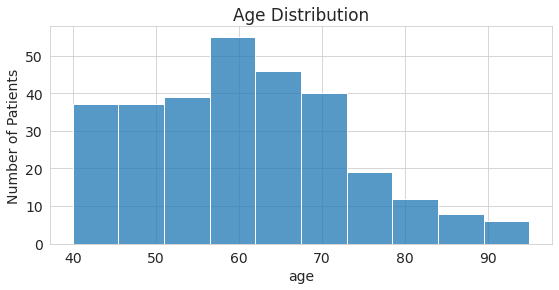

In [26]:
#Lets see the Age distribution
sns.histplot(x=heart['age'], color = 'tab:blue')
plt.ylabel('Number of Patients')
plt.title('Age Distribution');

From the above graph it seems that the most number of people affected by heart failures is of 60 years

In [27]:
# Lets see how many are male and female patients 

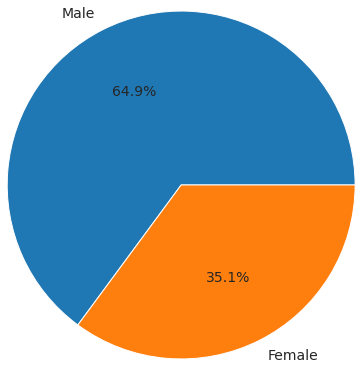

In [28]:
plt.pie(x=heart['sex'].value_counts(),labels=heart['sex'].value_counts().index
       ,autopct='%.1f%%',radius=2);

From the pie-chart it is clear that there are more male patients than female

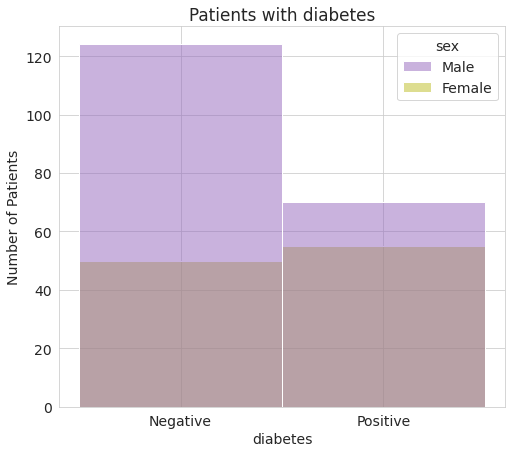

In [29]:
plt.figure(figsize=(8,7))
sns.histplot(x=heart['diabetes'],hue=heart['sex'],palette=['tab:purple','tab:olive'])
plt.ylabel('Number of Patients')
plt.title('Patients with diabetes');

From the above plot it is clear that very less males have diabetes whereas females are most diabetic patients 

In [30]:
heart

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,dead
0,75,Negative,Negative,20,Positive,265,1.9,130,Male,Non-Smoker,Dead
1,55,Negative,Negative,38,Negative,263,1.1,136,Male,Non-Smoker,Dead
2,65,Negative,Negative,20,Negative,162,1.3,129,Male,Smoker,Dead
3,50,Positive,Negative,20,Negative,210,1.9,137,Male,Non-Smoker,Dead
4,65,Positive,Positive,20,Negative,327,2.7,116,Female,Non-Smoker,Dead
...,...,...,...,...,...,...,...,...,...,...,...
294,62,Negative,Positive,38,Positive,155,1.1,143,Male,Smoker,Alive
295,55,Negative,Negative,38,Negative,270,1.2,139,Female,Non-Smoker,Alive
296,45,Negative,Positive,60,Negative,742,0.8,138,Female,Non-Smoker,Alive
297,45,Negative,Negative,38,Negative,140,1.4,140,Male,Smoker,Alive


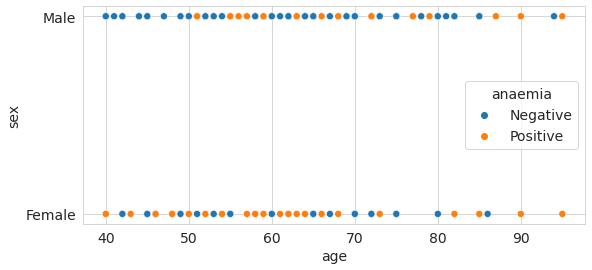

In [45]:
sns.scatterplot(x=heart['age'],y=heart['sex'],hue=heart['anaemia'],s=50);

From the scatter plot we can see that at the age of 40 female patients starts suffering from anaemia whereas in male's it is not usually common

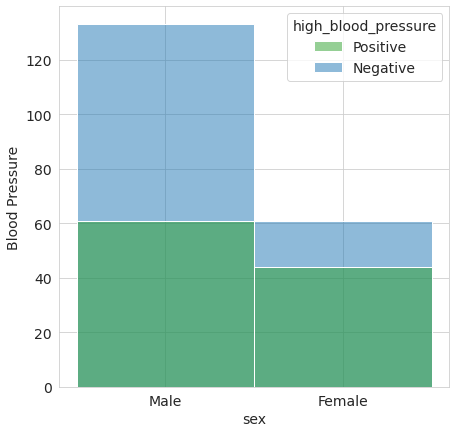

In [60]:
plt.figure(figsize=(7,7))
sns.histplot(x=heart['sex'],hue=heart['high_blood_pressure'],palette=['tab:green','tab:blue'])
plt.ylabel('Blood Pressure');

There are more males as compared to females in terms of higher blood pressure

Let us save and upload our work to Jovian before continuing

In [58]:
import jovian

In [158]:
jovian.commit(project='cardio')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilgawate111/cardio" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilgawate111/cardio


'https://jovian.ai/nikhilgawate111/cardio'

## Asking and Answering Questions

In this part we will have a glimpse on factors responsible for heart failure. For this I am going to merge a new dataframe into our existing dataframe. The dataset is taken from [here](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1). After this analysis I am going to clear some of the myth that most of the people have regarding cardiovascular patients.



In [64]:
#Lets import the new file 
limits = pd.read_html('https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1')[0]

In [80]:
limits.drop([14],inplace=True)

In [82]:
limits = limits.set_index('Feature')

In [89]:
limits['Normal Range']=['-','-','-','-','55 - 70','-','150 - 400 Kilo-platelets/ml', '0.6 - 1.2 mg/dL','135 - 145 mEq /L',
                                                                                     '-']

In [91]:
limits['Explanation']['Anaemia','High blood pressure','Diabetes','Smoking'] = ['Positive, if the patient has Anaemia',
                                                                                                  'Positive, if the patient has higher blood pressure',
                                                                                                  'Positive, if the patient has diabetes',
                                                                                                  'Positive, if the patients smokes']

In [93]:
limits

,Explanation,Measurement,Normal Range
Feature,,,
Age,Age of the patient,Years,-
Anaemia,"Positive, if the patient has Anaemia",Boolean,-
High blood pressure,"Positive, if the patient has higher blood pres...",Boolean,-
Diabetes,"Positive, if the patient has diabetes",Boolean,-
Ejection fraction,Percentage of blood leaving,Percentage,55 - 70
Sex,Woman or man,Binary,-
Platelets,Platelets in the blood,kiloplatelets/mL,150 - 400 Kilo-platelets/ml
Serum creatinine,Level of creatinine in the blood,mg/dL,0.6 - 1.2 mg/dL
Serum sodium,Level of sodium in the blood,mEq/L,135 - 145 mEq /L


#### Q1: How many people are suffering from Ejection fraction ?

In [120]:
heart.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,dead
0,75,Negative,Negative,20,Positive,265,1.9,130,Male,Non-Smoker,Dead
1,55,Negative,Negative,38,Negative,263,1.1,136,Male,Non-Smoker,Dead
2,65,Negative,Negative,20,Negative,162,1.3,129,Male,Smoker,Dead
3,50,Positive,Negative,20,Negative,210,1.9,137,Male,Non-Smoker,Dead
4,65,Positive,Positive,20,Negative,327,2.7,116,Female,Non-Smoker,Dead


In [102]:
heart.shape[0] - heart[heart['ejection_fraction'].between(55,70)].shape[0]

261

There are 261 Patients suffering from ejection fraction

#### Q2: Out of those 261 Ejection Fraciton Patients how many are male and female?

In [105]:
ej = heart[(heart['ejection_fraction']<55) | (heart['ejection_fraction']>70)]

In [107]:
ej['sex'].value_counts()

Male      176
Female     85
Name: sex, dtype: int64

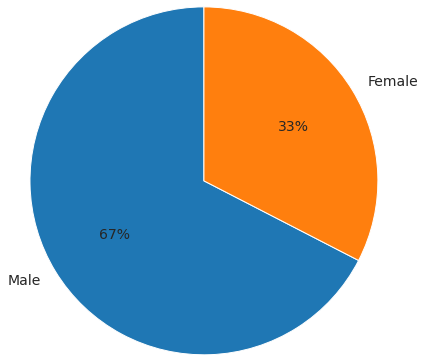

In [118]:
plt.pie(x=ej['sex'].value_counts(),labels=ej['sex'].value_counts().index,autopct='%.f%%',radius = 2,
        startangle=90);

There are approx 67% male patients and 33% female patients suffering from ejection fraction 

#### Q3: How many patients are dead and how many are alive?

In [123]:
heart

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,dead
0,75,Negative,Negative,20,Positive,265,1.9,130,Male,Non-Smoker,Dead
1,55,Negative,Negative,38,Negative,263,1.1,136,Male,Non-Smoker,Dead
2,65,Negative,Negative,20,Negative,162,1.3,129,Male,Smoker,Dead
3,50,Positive,Negative,20,Negative,210,1.9,137,Male,Non-Smoker,Dead
4,65,Positive,Positive,20,Negative,327,2.7,116,Female,Non-Smoker,Dead
...,...,...,...,...,...,...,...,...,...,...,...
294,62,Negative,Positive,38,Positive,155,1.1,143,Male,Smoker,Alive
295,55,Negative,Negative,38,Negative,270,1.2,139,Female,Non-Smoker,Alive
296,45,Negative,Positive,60,Negative,742,0.8,138,Female,Non-Smoker,Alive
297,45,Negative,Negative,38,Negative,140,1.4,140,Male,Smoker,Alive


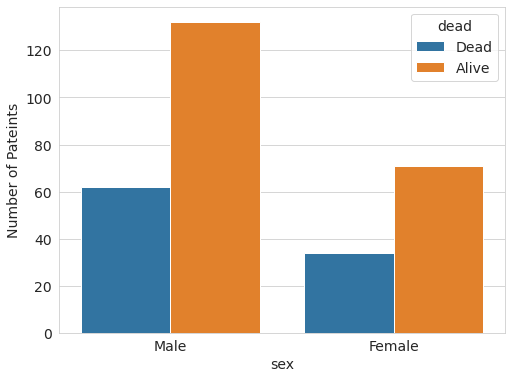

In [127]:
plt.figure(figsize=(8,6))
sns.countplot(x=heart['sex'],hue=heart['dead'])
plt.ylabel('Number of Pateints');


The count plot represents that there are many patients still alive which are suffering from cardiovascular disease

#### Q4: What is the relationship between each of the values?

In [129]:
heart.dtypes

age                      int64
anaemia                 object
diabetes                object
ejection_fraction        int64
high_blood_pressure     object
platelets                int64
serum_creatinine       float64
serum_sodium             int64
sex                     object
smoking                 object
dead                    object
dtype: object

In [142]:
numeric = heart[['age','ejection_fraction','platelets','serum_creatinine','serum_sodium']]

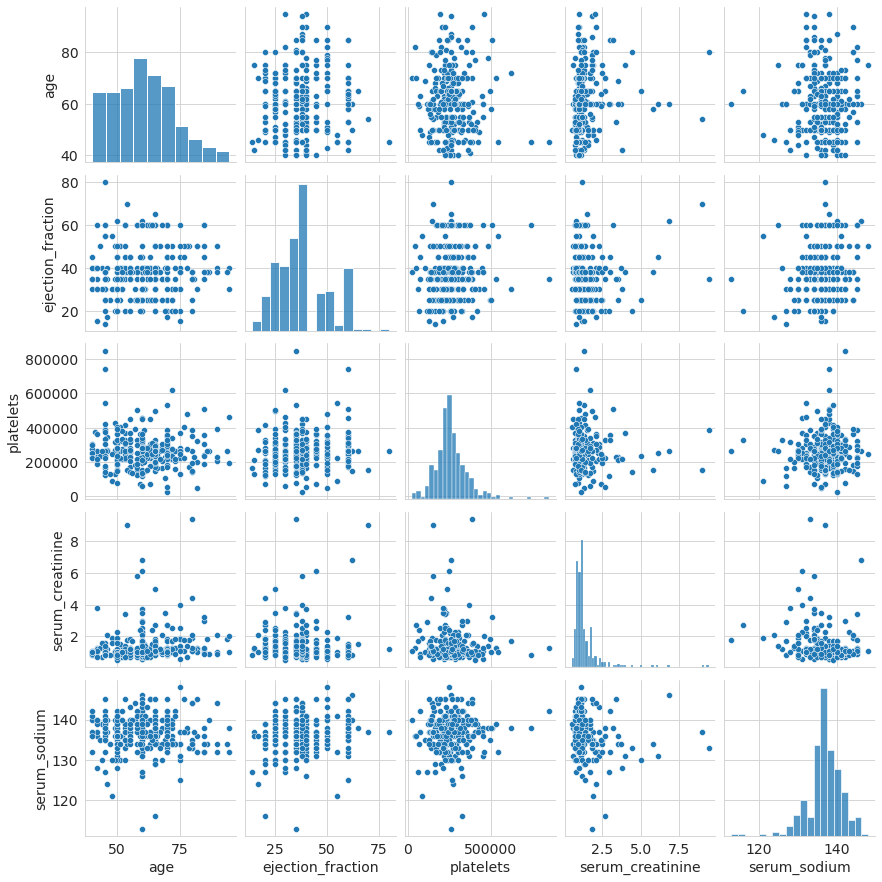

In [144]:
sns.pairplot(numeric);

From the above pairplot it is clear that there are very few patients who have lower serum creatinine

#### Q5: Is the age of patients normally distributed?

In [145]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


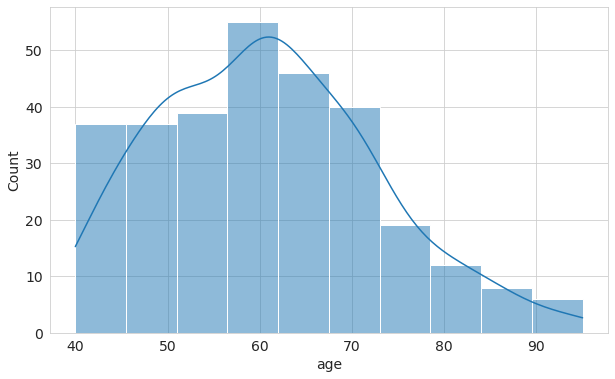

In [148]:
plt.figure(figsize=(10,6))
sns.histplot(x=heart['age'],kde=True);

The above graph is not normally distributed as the line is shifted more towards left

Let us save and upload our work to Jovian before continuing.

In [149]:
import jovian

In [150]:
jovian.commit(project='heart failure')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilgawate111/heart-failure" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilgawate111/heart-failure


'https://jovian.ai/nikhilgawate111/heart-failure'

## Inferences and Conclusion

We drew a lot of conclusions from the poll. Here's a quick rundown of a few: 
We can deduce that the dataset is marginally skewed based on the recorded patient gender, as only 35.1 percent of patients were female. 
We have a higher number of patients in the 60-65 age bracket, with the 50-55 age group coming in second. And the number of patients documented begins to decline in the 65-70 age range, which is understandable given that the average life expectancy in Pakistan in 2015 was around 67 years. 
During the follow-up period, 32.1 percent of patients died. This could be because the data in our data frame only covers a limited time span (April 2015 to December 2015), and more people may have died after then

In [151]:
import jovian

In [152]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilgawate111/heart-failure" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilgawate111/heart-failure


'https://jovian.ai/nikhilgawate111/heart-failure'

## References and Future Work

The dataset was used from  BMC Medical Informatics and Decision Making official site - https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1

pandas - https://pandas.pydata.org

matplotliv - https://matplotlib.org

In [153]:
import jovian

In [ ]:
jovian.commit(project = 'cardio')

<IPython.core.display.Javascript object>